In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [5]:
train_dir = "C:\\Users\\kshas\\Downloads\\archive\\train"
test_dir = "C:\\Users\\kshas\\Downloads\\archive\\test"

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [8]:
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 5
TRAIN_DIR = train_dir

In [9]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

In [10]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(IMG_SIZE,IMG_SIZE,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

In [11]:

resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24637826 (93.99 MB)
Trainable params: 1050114 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [12]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
# Setup the ImageDataGenerators
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # ResNet50 preprocessing
    validation_split=0.2,  # Use 20% of the data for validation
    # Add more data augmentation settings here if desired
)


In [14]:
train_gen = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',  # This fetches the training subset
)

Found 447 images belonging to 2 classes.


In [15]:
# Validation data generator
val_gen = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',  # This fetches the validation subset
)

Found 110 images belonging to 2 classes.


In [16]:
history = resnet_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

Epoch 1/5
14/14 [==============================] - 68s 4s/step - loss: 0.7849 - accuracy: 0.7696 - val_loss: 0.1974 - val_accuracy: 0.9182
Epoch 2/5
14/14 [==============================] - 56s 4s/step - loss: 0.1064 - accuracy: 0.9620 - val_loss: 0.1339 - val_accuracy: 0.9545
Epoch 3/5
14/14 [==============================] - 56s 4s/step - loss: 0.0320 - accuracy: 0.9888 - val_loss: 0.0610 - val_accuracy: 0.9727
Epoch 4/5
14/14 [==============================] - 55s 4s/step - loss: 0.0178 - accuracy: 0.9955 - val_loss: 0.0863 - val_accuracy: 0.9727
Epoch 5/5
14/14 [==============================] - 55s 4s/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0838 - val_accuracy: 0.9727


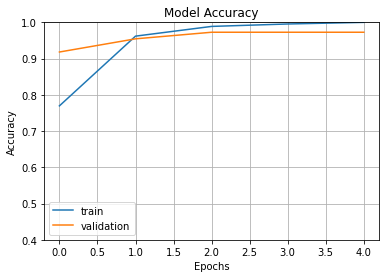

In [17]:

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
     

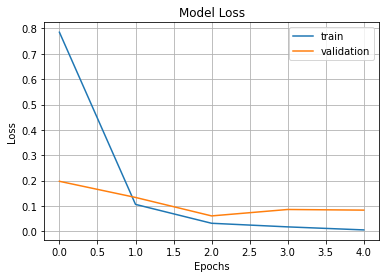

In [18]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
     

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

TEST_DIR =  "C:\\Users\\kshas\\Downloads\\archive\\test" 

# Image data generator for the test set
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Test data generator
test_gen = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 140 images belonging to 2 classes.


In [20]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Get true class labels
y_true = test_gen.classes

# Predict class probabilities
y_pred_probs = resnet_model.predict(test_gen)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print classification report to get precision, recall, and f1-score
report = classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys())

print("Accuracy:", accuracy)
print("\n", report)


5/5 [==============================] - 18s 3s/step
Accuracy: 0.9428571428571428

               precision    recall  f1-score   support

        cats       1.00      0.89      0.94        70
        dogs       0.90      1.00      0.95        70

    accuracy                           0.94       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.94      0.94       140



In [21]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

def predict_single_image(model, image_path):
    # Load the image and resize to the default input size for ResNet50
    img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    
    # Convert the PIL Image to a numpy array
    img_array = image.img_to_array(img)
    
    # Expand dimensions to match the shape that the model expects
    img_batch = np.expand_dims(img_array, axis=0)
    
    # Preprocess the image
    img_preprocessed = preprocess_input(img_batch)
    
    # Get model predictions for the image
    predictions = model.predict(img_preprocessed)
    
    # Get the class with highest probability
    predicted_class_idx = np.argmax(predictions[0])
    
    # Convert the index to the corresponding class label
    labels = list(test_gen.class_indices.keys())  # Assuming 'test_gen' is in scope
    predicted_class = labels[predicted_class_idx]
    
    return predicted_class


image_path = "C:\\Users\\kshas\\Downloads\\archive\\test\\dogs\\dog_59.jpg"
print(predict_single_image(resnet_model, image_path))


1/1 [==============================] - 2s 2s/step
dogs
